In [54]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

from collections import defaultdict
from config import api_key

from citipy import citipy

output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [55]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

In [56]:
# build the query url for one city. I just want to check my if my API call is correct
url = "http://api.openweathermap.org/data/2.5/weather?"


# for city in cities:
    
city_params = {
    'appid':api_key,
    'q':'London'
}


    
response = requests.get(url, params=city_params).json()

# weather_json = response.json
response

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 275.2,
  'pressure': 1011,
  'humidity': 86,
  'temp_min': 273.15,
  'temp_max': 277.15},
 'visibility': 10000,
 'wind': {'speed': 3.1, 'deg': 280},
 'rain': {},
 'clouds': {'all': 0},
 'dt': 1573267686,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1573283248,
  'sunset': 1573316474},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [120]:
# Now,iterate my api call to create a dictionary of current weather parameters for each city and append those dictionaries to my list
# It is better to have all my variables inside a dictionary to create a dataframe. I want to store these dictionaries into a list

city_info = []



for city in cities:
    try:

        url = "http://api.openweathermap.org/data/2.5/weather?"

        city_params = {
            'appid':api_key,
            'q':city,
            'units':'Imperial'
        }



        response = requests.get(url, params=city_params).json()
        name=response['name']
        lat = response['coord']['lat']
        temp = response['main']['temp_max']
        humid = response['main']['humidity']
        cloud = response['clouds']['all']
        wind = response['wind']['speed']

        city_dict = {'City':name,
                     'Latitude':lat,
                     'Max Temperature(F)':temp,
                     'Humidity(%)':humid,
                     'Cloudiness(%)':cloud,
                     'Wind Speed(mph)':wind
                    }
        
        city_info.append(city_dict)
        
    except:
        print('no city info')

city_info    
    

no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info
no city info


[{'City': 'Sao Filipe',
  'Latitude': 14.9,
  'Max Temperature(F)': 73.65,
  'Humidity(%)': 80,
  'Cloudiness(%)': 100,
  'Wind Speed(mph)': 16.33},
 {'City': 'Severo-Kurilsk',
  'Latitude': 50.68,
  'Max Temperature(F)': 28.85,
  'Humidity(%)': 77,
  'Cloudiness(%)': 97,
  'Wind Speed(mph)': 21.07},
 {'City': 'Lorengau',
  'Latitude': -2.02,
  'Max Temperature(F)': 83.43,
  'Humidity(%)': 75,
  'Cloudiness(%)': 66,
  'Wind Speed(mph)': 5.59},
 {'City': 'Tiassale',
  'Latitude': 5.9,
  'Max Temperature(F)': 72.86,
  'Humidity(%)': 97,
  'Cloudiness(%)': 2,
  'Wind Speed(mph)': 1.54},
 {'City': 'Ushuaia',
  'Latitude': -54.81,
  'Max Temperature(F)': 33.8,
  'Humidity(%)': 98,
  'Cloudiness(%)': 75,
  'Wind Speed(mph)': 20.8},
 {'City': 'Richards Bay',
  'Latitude': -28.77,
  'Max Temperature(F)': 69.66,
  'Humidity(%)': 71,
  'Cloudiness(%)': 98,
  'Wind Speed(mph)': 13.51},
 {'City': 'Punta Arenas',
  'Latitude': -53.16,
  'Max Temperature(F)': 35.6,
  'Humidity(%)': 74,
  'Cloudiness

In [121]:
# Create dataframe from list of dictionaries
weather_df = pd.DataFrame(city_info)
weather_df

,City,Latitude,Max Temperature(F),Humidity(%),Cloudiness(%),Wind Speed(mph)
0,Sao Filipe,14.90,73.65,80,100,16.33
1,Severo-Kurilsk,50.68,28.85,77,97,21.07
2,Lorengau,-2.02,83.43,75,66,5.59
3,Tiassale,5.90,72.86,97,2,1.54
4,Ushuaia,-54.81,33.80,98,75,20.80
...,...,...,...,...,...,...
560,Bone,51.97,45.00,93,90,9.17
561,Kota Belud,6.35,78.01,94,90,23.04
562,Broken Hill,-31.97,62.60,29,0,10.29
563,Conceicao da Barra,-18.59,77.92,81,100,20.71


In [122]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 6 columns):
City                  565 non-null object
Latitude              565 non-null float64
Max Temperature(F)    565 non-null float64
Humidity(%)           565 non-null int64
Cloudiness(%)         565 non-null int64
Wind Speed(mph)       565 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 26.6+ KB


TypeError: 'str' object is not callable

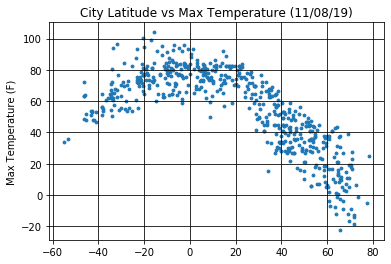

In [123]:
# Create scatter plot of temperarture vs latitude



plt.scatter(weather_df['Latitude'], weather_df['Max Temperature(F)'], s=8)
plt.title('City Latitude vs Max Temperature (11/08/19)')
plt.ylabel('Max Temperature (F)')
plt.grid(c='black')
plt.xlabel('Latitude')





plt.tight_layout

TypeError: 'str' object is not callable

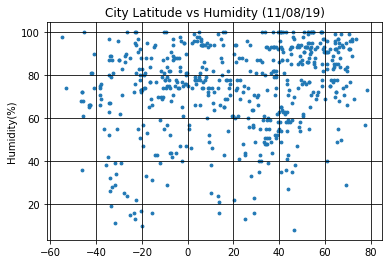

In [124]:
# Create scatter plot of humidity vs latitude



plt.scatter(weather_df['Latitude'], weather_df['Humidity(%)'], s=8)
plt.title('City Latitude vs Humidity (11/08/19)')
plt.ylabel('Humidity(%)')
plt.grid(c='black')
plt.xlabel('Latitude')





plt.tight_layout

TypeError: 'str' object is not callable

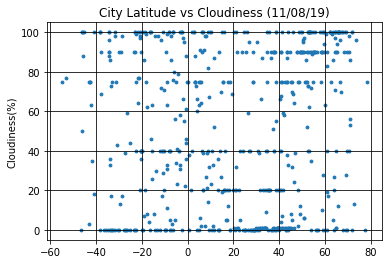

In [125]:
# Create Scatter Plot of Cloudiness vs Latitude

plt.scatter(weather_df['Latitude'], weather_df['Cloudiness(%)'], s=8)
plt.title('City Latitude vs Cloudiness (11/08/19)')
plt.ylabel('Cloudiness(%)')
plt.grid(c='black')
plt.xlabel('Latitude')





plt.tight_layout

TypeError: 'str' object is not callable

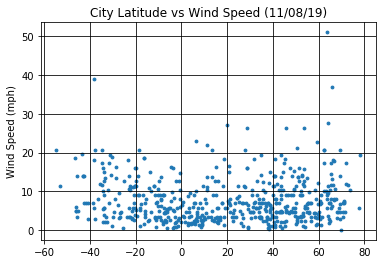

In [127]:
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed(mph)'], s=8)
plt.title('City Latitude vs Wind Speed (11/08/19)')
plt.ylabel('Wind Speed (mph)')
plt.grid(c='black')
plt.xlabel('Latitude')





plt.tight_layout

Judging from the graphs we can see a few trends. First, max temperature for the current day tends to increase as we analyze cities from the poles to the equator. Secondly, there seems to be no trend in regards to humidity and a cities latitude. Most likely because a city's humidity is determined by how close a city is to the coast and the direction wind currents. Thirdly, there seems to be a bimodal distribution between cloudiness and a city's latitude. Although, this might be a stretch to claim since there are quite a few point inbetween. Lastly, no matter what latitude a city seems to be at, the wind speed for the day is typically below 10 mph. On a final note, selecting our random latitude and longitudes for cities, we may want to shorten the range for both parameters. For example, we could select random latitudes and longitudes from lat = 0 to 90 and lng = 90 to 180. Shortening the range for latitude will allow us to perform a linear regression which will then allow us to quantatively say if there is a trend or not. Shortening the range for longitude will effectively reduce the variance caused by cities being in different time zones. For example, we could have retreived current weather for a city that was at noon but on the same latitude line we could have retrieved current weather for a city that was at midnight. Day and Night weather can be significanlty different and this is a source of variance for our analysis.